# Assignment 3: Image Upload, Processing & Analysis

**Name:** Thandekar Saikrishna Rao  
**Roll No:** XXXXX  
**Date:** September 6, 2025  

This notebook demonstrates image upload, preprocessing, and analysis as part of Assignment 3.  
We use Python, OpenCV, PIL, NumPy, and Matplotlib.


In [1]:
# Install if running in Colab
# !pip install opencv-python pillow matplotlib numpy

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


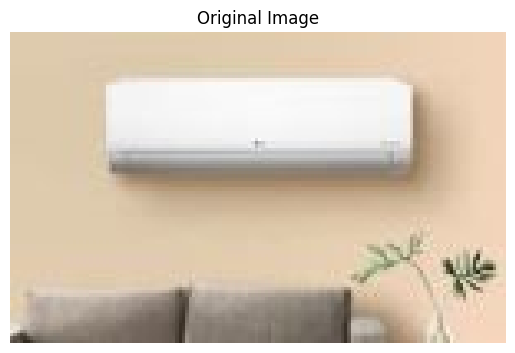

In [3]:
# Load a sample image (replace with your path)
image_path = "/content/1.jpg"  # upload your image
img = cv2.imread(image_path)

# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

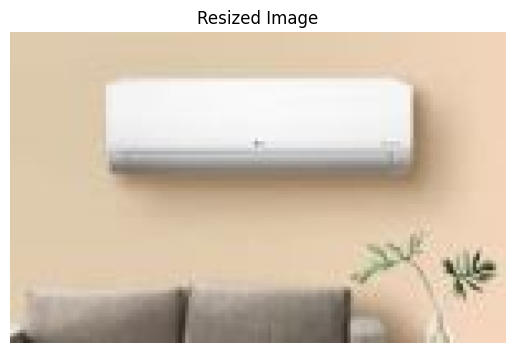

In [4]:
def resize_image(img, width=256, keep_aspect=True):
    h, w = img.shape[:2]
    if keep_aspect:
        scale = width / w
        new_w, new_h = int(w * scale), int(h * scale)
    else:
        new_w, new_h = width, width
    return cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

resized = resize_image(img_rgb, width=300)
plt.imshow(resized)
plt.title("Resized Image")
plt.axis("off")
plt.show()


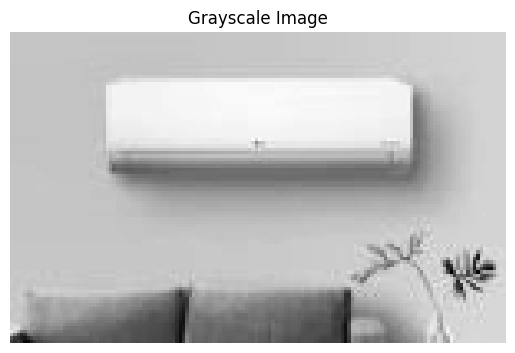

In [5]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()



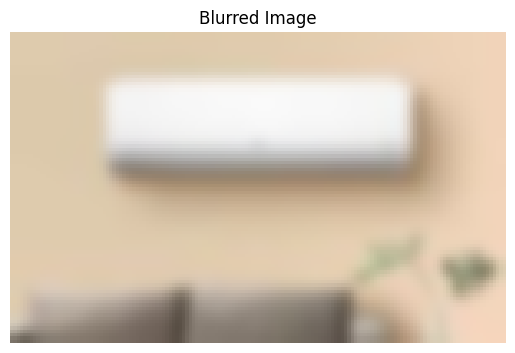

In [6]:
blurred = cv2.GaussianBlur(img_rgb, (11, 11), 0)

plt.imshow(blurred)
plt.title("Blurred Image")
plt.axis("off")
plt.show()


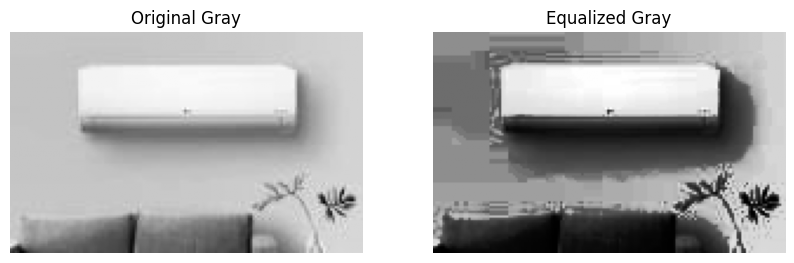

In [7]:
gray_eq = cv2.equalizeHist(gray)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Original Gray")
axs[0].axis("off")

axs[1].imshow(gray_eq, cmap="gray")
axs[1].set_title("Equalized Gray")
axs[1].axis("off")

plt.show()


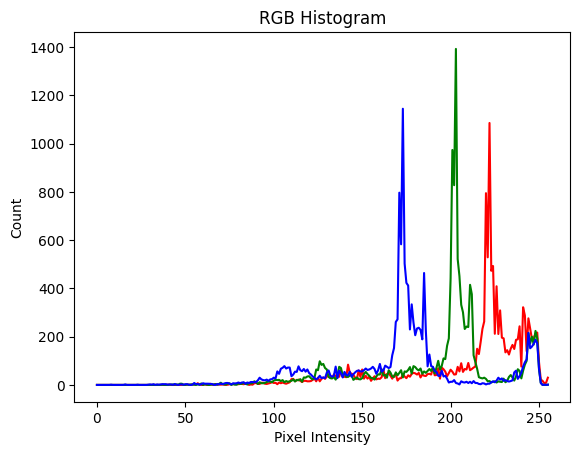

In [8]:
colors = ('r', 'g', 'b')
plt.figure()
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title("RGB Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.show()


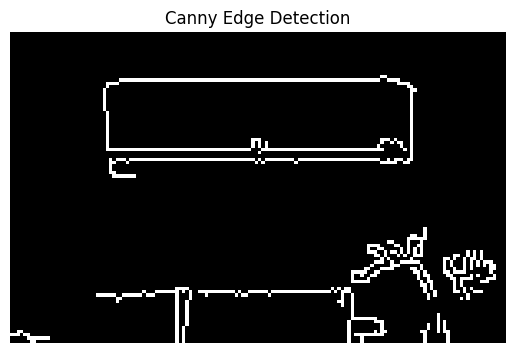

In [9]:
edges = cv2.Canny(gray, 100, 200)

plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()


In [10]:
print("Image Shape:", img_rgb.shape)
print("Mean Intensity:", np.mean(img_rgb))
print("Std Dev Intensity:", np.std(img_rgb))


Image Shape: (94, 150, 3)
Mean Intensity: 191.9200472813239
Std Dev Intensity: 39.95690633750264


In [11]:
cv2.imwrite("processed.png", cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR))
print("Processed image saved as processed.png")


Processed image saved as processed.png
